In this quiz, we’ll explore and build time series forecasting models for measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years.

Data Set Information:

Data Link: https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

This archive contains 2075259 measurements gathered between December 2006 and November 2010 (47 months).

Notes:

1.(globalactivepower*1000/60 - submetering1 - submetering2 - submetering3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2.The dataset contains some missing values in the measurements (nearly 1.25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

Attribute Information:

date: Date in format dd/mm/yyyy
time: time in format hh:mm:ss
globalactivepower: household global minute-averaged active power (in kilowatt)
globalreactivepower: household global minute-averaged reactive power (in kilowatt)
voltage: minute-averaged voltage (in volt)
global_intensity: household global minute-averaged current intensity (in ampere)
submetering1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
submetering2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
submetering3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

Using the daily sampling rate (sum), divide the data into a train and test set. The last 300 days is your test set and the first (x-300) days is your training set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series modeling using this time column (‘dt’ or ‘ds’) and the global_active_power (or ‘y’). Answer question 14 - 16

Multivariate Time Series Forecasting with Facebook Prophet

In the last exercise, we used only the dependent variable (Global_Active_Power) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the six independent variables ['Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3'] will be [‘add1’, ‘add2’, ‘add3’, ‘add4’, ‘add5’, ‘add6’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last 300 days of the house consumption (‘global_active_power’). Answer questions 17-20:



In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Data/household_power_consumption5.csv", delimiter= ";")

<ipython-input-107-b36bdd578cb6>:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Data/household_power_consumption5.csv", delimiter= ";")


In [ ]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [ ]:
# convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"], dayfirst = True)

In [ ]:
# convert the time to hh:mm:ss
df["Time"] = pd.to_datetime(df["Time"], format='%H:%M:%S')



In [ ]:
# convert all the other columns which are in object back to floats
column = ['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_1',
          'Sub_metering_2', 'Sub_metering_3']
df[column] = df[column].apply(pd.to_numeric, errors='coerce')



In [ ]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Firstly, forward-fill all the missing values.Resample the data from a minute sampling rate to an hourly sampling rate (i.e sum over the minutes for each hour). Which of the following is a plot of the hourly global_active_power over time?

In [ ]:
# forward fill missing values
df = df.fillna(method='ffill')


In [ ]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
df.shape

(2075259, 9)

In [ ]:
# Set 'datetime' as the index
df.set_index('Time', inplace=True)
# Resample data to hourly and sum the values
df= df.resample('H').sum()


<ipython-input-93-32b0a1b79352>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df= df.resample('H').sum()


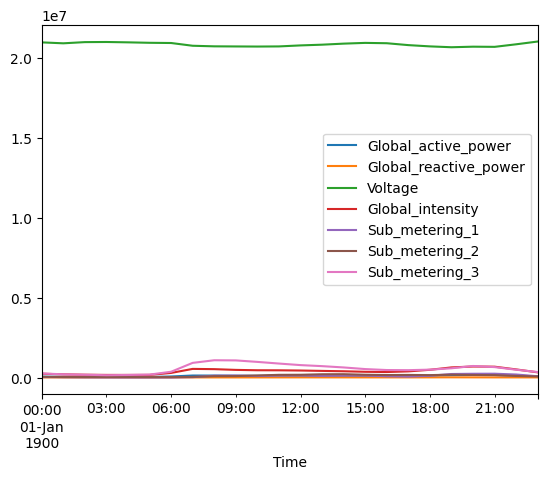

In [ ]:
# plot of the globally active power over the time
df.plot()
plt.show()

In [ ]:
# Calculate Pearson correlation coefficient
pearson_corr = df['Global_active_power'].corr(df['Voltage'])
# Print the result rounded to 3 decimal places
print(f"Pearson Correlation Coefficient: {pearson_corr:.3f}")

Pearson Correlation Coefficient: -0.869


In [ ]:
# Pearson correlation coefficient between the Voltage and global_intensity
pearson_corr1 = df['Voltage'].corr(df['Global_intensity'])
# Print the result rounded to 3 decimal places
print(f"Pearson Correlation Coefficient: {pearson_corr:2f}")

Pearson Correlation Coefficient: -0.868530


Using the daily sampling rate (sum), divide the data into a train and test set. The last 300 days is your test set and the first (x-300) days is your training set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series modeling using this time column (‘dt’ or ‘ds’) and the global_active_power (or ‘y’). Answer questions 14 - 16

Evaluating the results of your time series modeling on the test set. What is the MAPE (in %) in 2 decimal places?



In [ ]:
from prophet import Prophet

In [ ]:
df.sort_values(by='Date', inplace=True)

In [ ]:
#split the data set as requested
train_set = df.iloc[:-300]
test_set = df.iloc[-300:]

In [ ]:
# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(train_set[['Time', 'Global_active_power']].rename(columns={'Time': 'ds', 'Global_active_power': 'y'}))



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp410alwnm/at4fri8s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp410alwnm/ykpwhhwz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62171', 'data', 'file=/tmp/tmp410alwnm/at4fri8s.json', 'init=/tmp/tmp410alwnm/ykpwhhwz.json', 'output', 'file=/tmp/tmp410alwnm/prophet_modelp3z0fu2v/prophet_model-20231205202731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:47:07 - cmdstanpy - INFO - Chain

In [ ]:
# Create a DataFrame for future predictions
future = pd.DataFrame({'ds': test_set['Time']})


In [ ]:
# Make predictions on the test set
forecast = prophet_model.predict(future)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAPE
mape = mean_absolute_error(test_set['Global_active_power'], forecast['yhat']) / test_set['Global_active_power'].mean() * 100

# Print the result rounded to 2 decimal places
print(f"MAPE: {mape:.2f}%")


MAPE: 73.22%


In [ ]:
rmse = np.sqrt(mean_squared_error(test_set['Global_active_power'], forecast['yhat']))

# Print the results
print(f"RMSE: {rmse:.2f}")

RMSE: 1.44


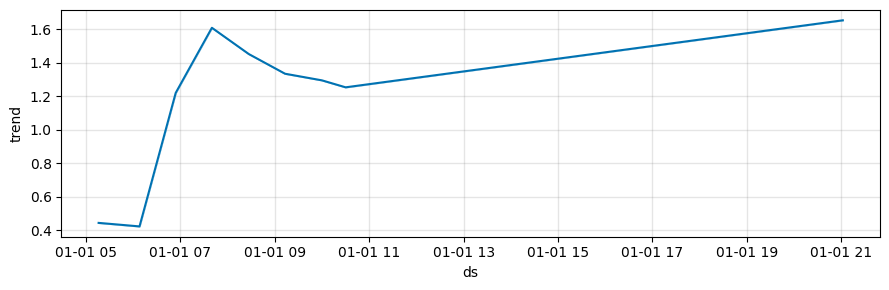

KeyError: ignored

In [ ]:
# Plot the components from the forecasted model
fig = prophet_model.plot_components(forecast)
plt.show()

# Find the day of the weekly seasonality with the lowest value
lowest_weekly_seasonality_day = forecast['weekly'].idxmin()
print(f"Day of the weekly seasonality with the lowest value: {lowest_weekly_seasonality_day}")


Multivariate Time Series Forecasting with Facebook Prophet

In the last exercise, we used only the dependent variable (Global_Active_Power) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the six independent variables ['Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3'] will be [‘add1’, ‘add2’, ‘add3’, ‘add4’, ‘add5’, ‘add6’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last 300 days of the house consumption (‘global_active_power’). Answer questions 17-20:

Evaluating the results of your time series modeling on the test set, what is the MAPE (in %) in 2 decimal places?. What is the RMSE in 2 decimal places?

If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the lowest value?





In [138]:
# exercsie 17-20

# Sort the DataFrame by the time column
df.sort_values(by='Time', inplace=True)

# Divide the data into train and test sets
train_set = df.iloc[:-300]
test_set = df.iloc[-300:]

# Initialize the Prophet model
prophet_model = Prophet()

# Add the regressors to the model
for col in ['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    prophet_model.add_regressor(col)

# Fit the model on the training set
prophet_model.fit(train_set.rename(columns={'Time': 'ds', 'Global_active_power': 'y'}))

# Create a DataFrame for future predictions
future = pd.DataFrame({'ds': test_set['Time']})

# Add future regressor values to the DataFrame
for col in ['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    future[col] = test_set[col]

# Make predictions on the test set
forecast = prophet_model.predict(future)





INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp410alwnm/qvw95xbb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp410alwnm/4qfpmlkp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69872', 'data', 'file=/tmp/tmp410alwnm/qvw95xbb.json', 'init=/tmp/tmp410alwnm/4qfpmlkp.json', 'output', 'file=/tmp/tmp410alwnm/prophet_modelx10rgjh1/prophet_model-20231205212142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:21:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:37:00 - cmdstanpy - INFO - Chain

In [139]:
# Evaluate the results
mape_multivariate = mean_absolute_error(test_set['Global_active_power'], forecast['yhat']) / test_set['Global_active_power'].mean() * 100
rmse_multivariate = np.sqrt(mean_squared_error(test_set['Global_active_power'], forecast['yhat']))

# Print the results
print(f"MAPE (Multivariate): {mape_multivariate:.2f}%")
print(f"RMSE (Multivariate): {rmse_multivariate:.2f}")



MAPE (Multivariate): 98.60%
RMSE (Multivariate): 1.19


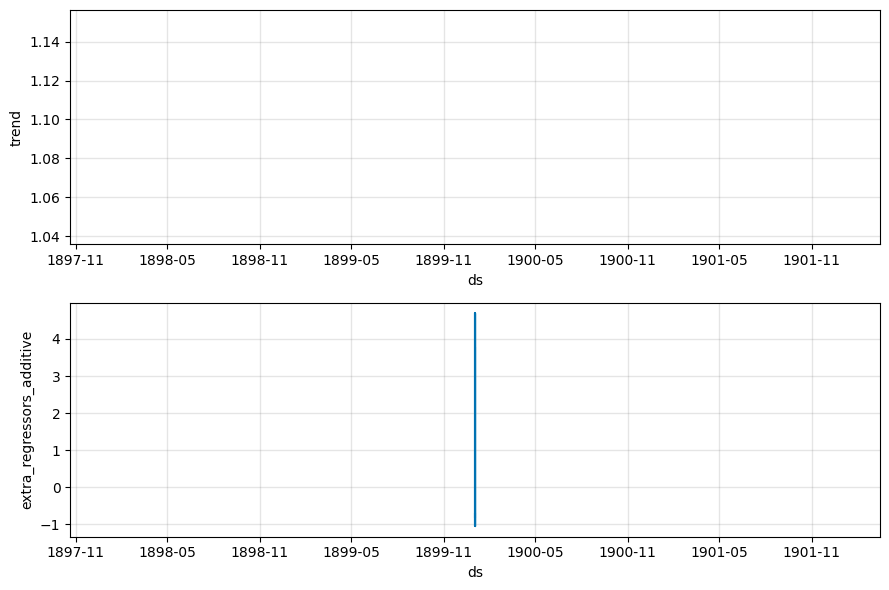

In [140]:
import matplotlib.pyplot as plt
# Plot the components from the multivariate forecasted model
fig_multivariate = prophet_model.plot_components(forecast)
plt.show()




In [141]:
# Find the day of the daily seasonality with the lowest value
lowest_daily_seasonality_day_multivariate = forecast['daily'].idxmin()
print(f"Day of the daily seasonality with the lowest value (Multivariate): {lowest_daily_seasonality_day_multivariate}")

KeyError: ignored